In [2]:
from src.text_clustering import ClusterClassifier
from datasets import load_dataset
import pickle
import os
os.environ['CURL_CA_BUNDLE'] = ''

In [7]:
texts = load_dataset('openpecha/cleaned_MT_v1.0.2', split="train")["Target"]

Using the latest cached version of the dataset since openpecha/cleaned_MT_v1.0.2 couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/j/.cache/huggingface/datasets/openpecha___cleaned_mt_v1.0.2/default/0.0.0/f89a8ce696a5711c5dfd57352677aad125224ee9 (last modified on Sat Oct 19 12:09:43 2024).


In [ ]:
texts = load_dataset('openpecha/cleaned_MT_v1.0.2', split="train")["Target"]

cc = ClusterClassifier()

embeddings = cc.embed(texts)

with open('embeddings.pkl', 'wb') as handle:
    pickle.dump(embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)

projections = cc.project(embeddings)

with open('projections.pkl', 'wb') as handle:
    pickle.dump(projections, handle, protocol=pickle.HIGHEST_PROTOCOL)



INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Batches:   0%|          | 0/24422 [00:00<?, ?it/s]

In [3]:
cc = ClusterClassifier()

with open('embeddings.pkl', 'rb') as handle:
    embeddings = pickle.load(handle)

cc.embeddings = embeddings

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2


In [4]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(embeddings)
projections = tsvd.transform(embeddings)

cc.projections = projections

In [5]:
cluster_labels = cc.cluster(projections, clustering_algorithm='kmeans')

Using K-Means (n_clusters)=(8)


In [9]:
from huggingface_hub import notebook_login

notebook_login()

Token has not been saved to git credential helper.


In [10]:
cc.fit(texts, clustering_algorithm='kmeans')

INFO:root:using precomputed embeddings...
INFO:root:building faiss index...
INFO:root:using precomputed projections...
INFO:root:clustering...


Using K-Means (n_clusters)=(8)


INFO:root:summarizing cluster centers...


Request:
<s>[INST]Example 1:
He could kick the ball accurately and hard, he was good at hitting it with his head, and he was so fast that he could easily steal the ball from his opponents.

Example 2:
In that state, may the excellent fragrances of the burnt offering,

Example 3:
These were the jobs most black men did.

Example 4:
Oṃ svasti!

Example 5:
Plotinus had died at Rome less than a hundred years before Augustine was born, and the young man found himself attracted by Plotinus's calm but intense quest, as manifested in his teachings and in his life, for mystical union with the Good through the exercise of pure intelligence. The patient efforts of his mother, who is revered as Santa Monica because she helped to convert that extraordinary man St. Augustine, and

Example 6:
They don’t last long.

Example 7:
His left holds a white silver bell at his hip.

Example 8:
Pressing “Delete” How do you delete the bad memories of the past?

Example 9:
But soft!

Example 10:
I think that is qu

(array([[ 0.04780203,  0.04000055, -0.05981692, ...,  0.00489584,
          0.00694551,  0.02175724],
        [ 0.01025691,  0.03755562, -0.03488231, ...,  0.03037239,
          0.06934453,  0.04535966],
        [ 0.06788865,  0.05265129, -0.00245365, ..., -0.02004915,
          0.01624518, -0.07806622],
        ...,
        [-0.06300915, -0.01817908, -0.04587376, ..., -0.07716463,
         -0.02175816,  0.00962112],
        [ 0.03122206,  0.07716458, -0.03728424, ...,  0.06525191,
         -0.04276469, -0.02403527],
        [-0.06240058,  0.01719361,  0.03681736, ...,  0.02248679,
          0.02565135, -0.01567748]], dtype=float32),
 array([0, 2, 1, ..., 1, 1, 7], dtype=int32),
 {-1: 'None',
  0: 'Skills, Religion, Time',
  1: 'Mind training, Mantra path, Compassion',
  2: 'Brain physiology, Buddhism, Permanence',
  3: 'Loyalty, Meditation, Supernatural beings',
  4: 'Burning, DNA analysis, Regulatory reform',
  5: 'Meditation, Phenomena, Compassion',
  6: 'Love, Protection, Determina

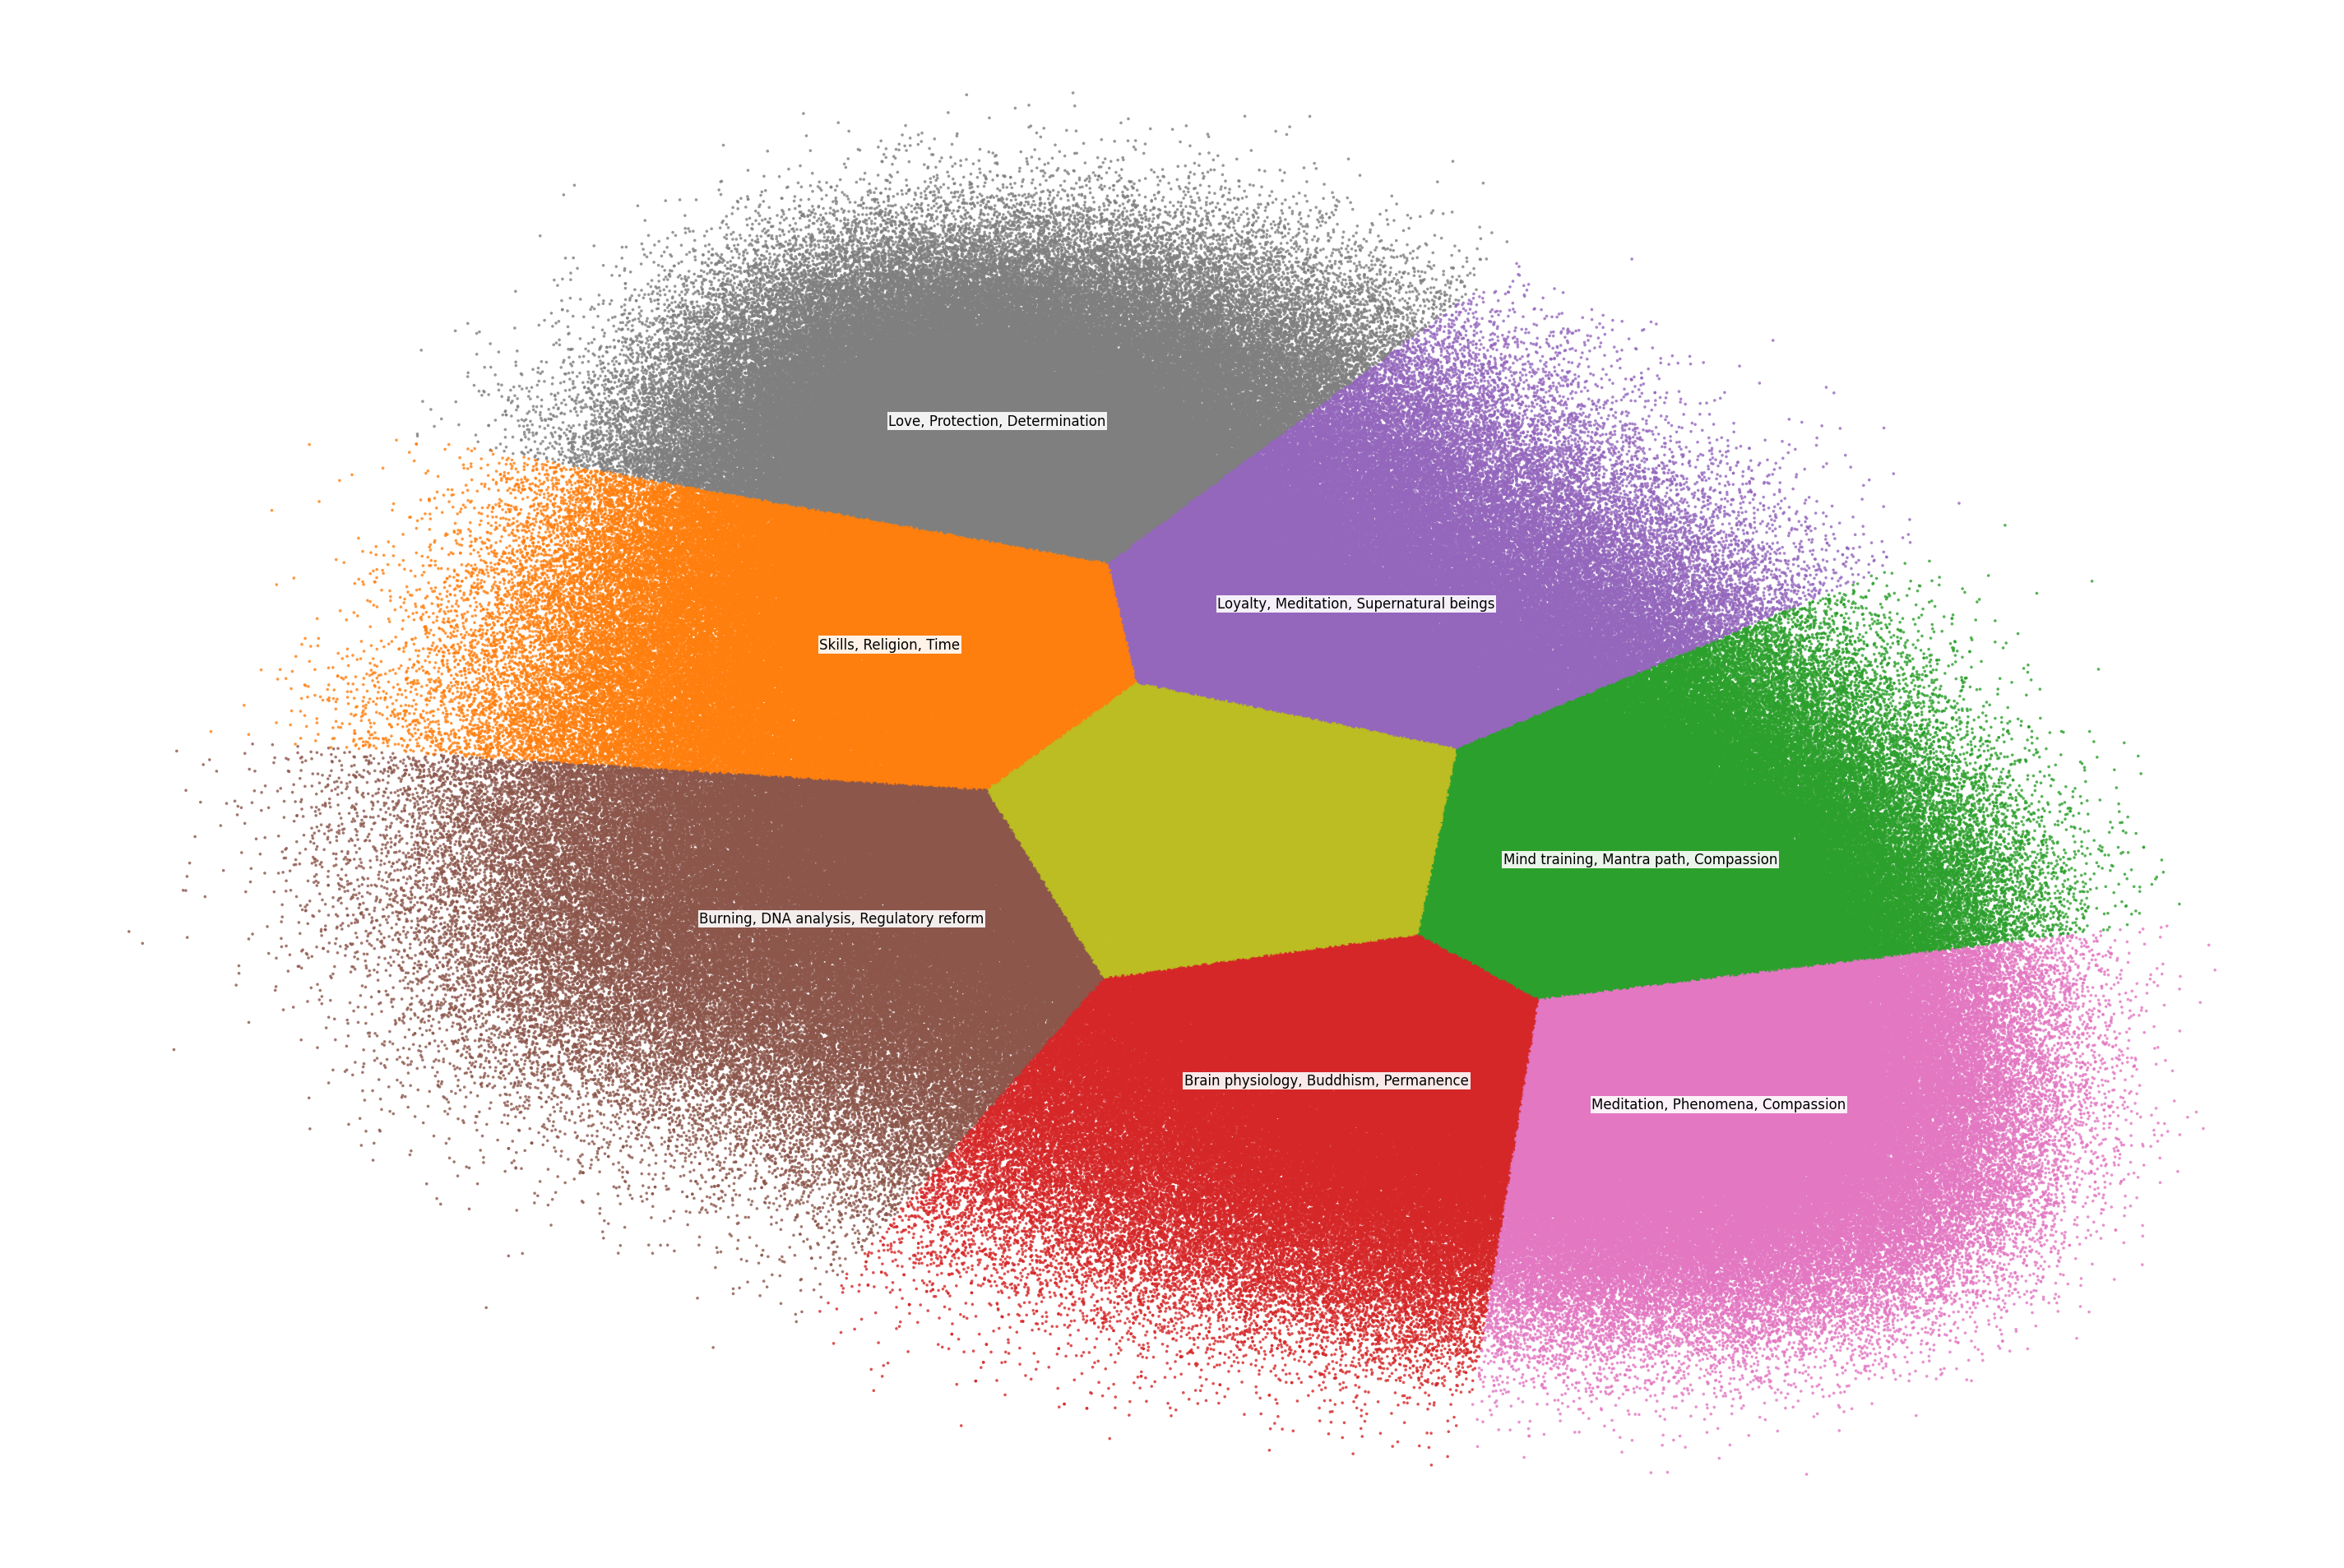

In [11]:
cc.show()